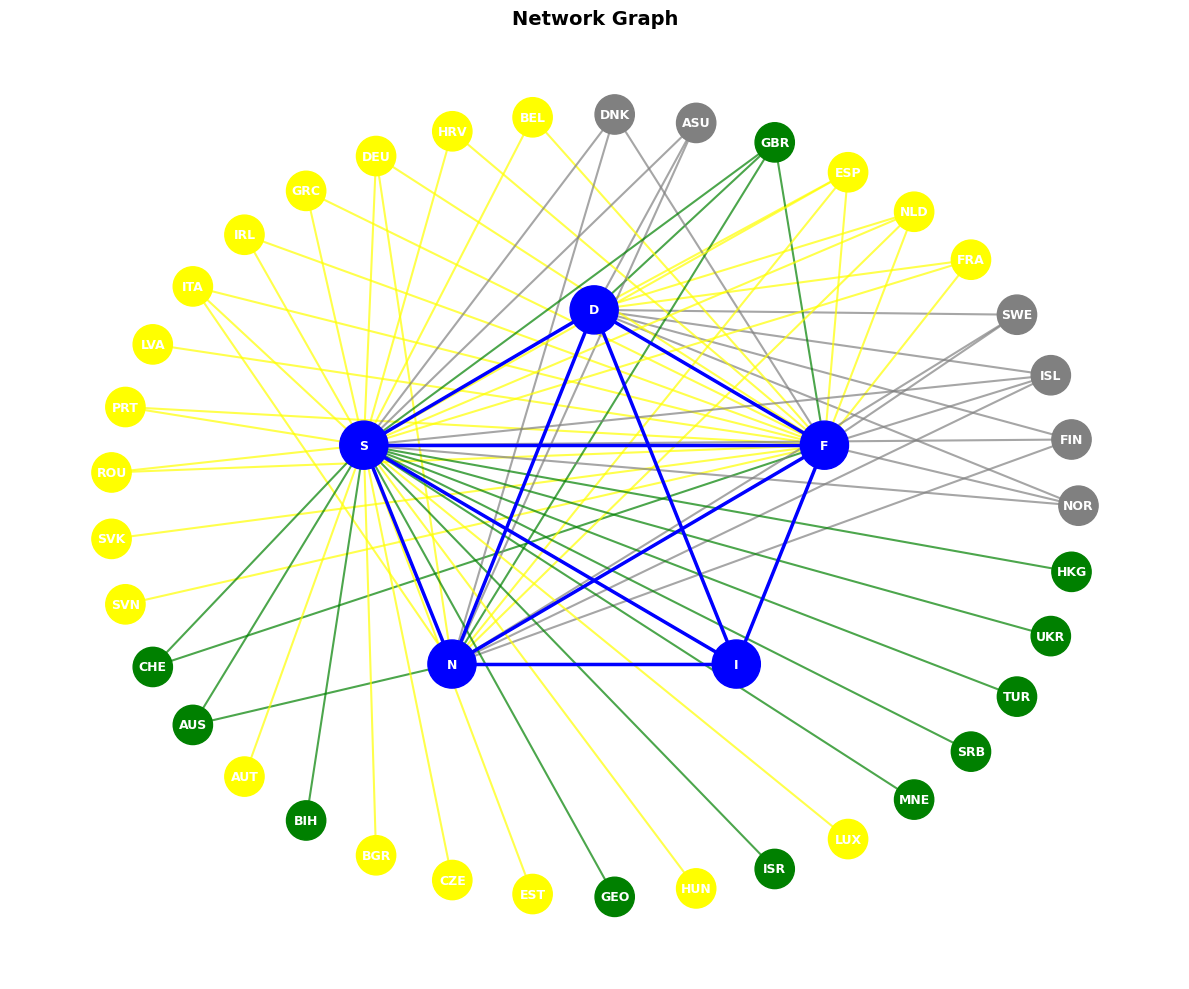

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Load Data
data = pd.read_csv("networks_assignment.csv", index_col=0)

# Initialize Graph
G = nx.Graph()

# Add nodes
for label in data.index:
    G.add_node(label)

# Add edges based on dataset
for i, label1 in enumerate(data.index):
    for j, label2 in enumerate(data.columns):
        if data.iloc[i, j] > 0:  # Only add edges where there is a connection
            G.add_edge(label1, label2)

# Define central pentagram nodes
central_nodes = ["D", "F", "I", "N", "S"]
outer_nodes = [node for node in G.nodes if node not in central_nodes]

# Manually add missing edges to enforce pentagram connections
pentagram_edges = [("D", "F"), ("F", "I"), ("I", "N"), ("N", "S"), ("S", "D"),  # Outer pentagram edges
                   ("D", "I"), ("F", "N"), ("I", "S"), ("N", "D"), ("S", "F")]  # Inner pentagram edges

G.add_edges_from(pentagram_edges)

# Define positions for pentagram nodes (manually aligned to a pentagram shape)
central_positions = {
    "D": (0, 1),
    "F": (0.951, 0.309),
    "I": (0.587, -0.809),
    "N": (-0.587, -0.809),
    "S": (-0.951, 0.309),
}

# Define positions for outer nodes in a circular layout around the pentagram
outer_positions = nx.circular_layout(outer_nodes, scale=2)

# Merge positions together
positions = {**central_positions, **outer_positions}

# Define colors for nodes
node_colors = {
    "blue": ["D", "F", "I", "N", "S"],  # Pentagram nodes
    "green": ["BIH", "GEO", "ISR", "MNE", "SRB", "CHE", "TUR", "UKR", "GBR", "AUS", "HKG", "USA"],
    "yellow": ["AUT", "BEL", "BGR", "HRV", "CZE", "EST", "FRA", "DEU", "GRC", "HUN", "IRL",
               "ITA", "LVA", "LUX", "NLD", "PRT", "ROU", "SVK", "SVN", "ESP"],
}

# Map each node to its corresponding color
node_to_color = {node: color for color, nodes in node_colors.items() for node in nodes}

# Assign colors for visualization
node_color_list = [node_to_color.get(node, "gray") for node in G.nodes]

# Define different node sizes
node_sizes = {node: 1200 if node in central_nodes else 800 for node in G.nodes}

# Create the plot
plt.figure(figsize=(12, 10))

# Draw edges with color matching the destination node
edge_colors = [node_to_color.get(v, "gray") for (u, v) in G.edges()]
nx.draw_networkx_edges(G, positions, alpha=0.7, edge_color=edge_colors, width=1.5)

# Draw pentagram edges in *BLUE* to make them stand out
nx.draw_networkx_edges(G, positions, edgelist=pentagram_edges, edge_color="blue", width=2.5)

# Draw nodes with appropriate colors
nx.draw_networkx_nodes(G, positions, node_color=node_color_list, node_size=[node_sizes[node] for node in G.nodes])

# Add labels with *white* color for visibility
for node, (x, y) in positions.items():
    plt.text(x, y, node, fontsize=9, fontweight="bold", ha="center", va="center", color="white")

# Display Graph
plt.title("Network Graph", fontsize=14, fontweight="bold")
plt.axis("off")
plt.tight_layout() 
plt.show()
